In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
train = pd.read_csv('D:/Github/Kaggle/Project_05/dataset/train.csv', index_col=None)
test = pd.read_csv('D:/Github/Kaggle/Project_05/dataset/test.csv')
print(train.shape)
train.head()

(54273, 13)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54273 non-null  int64  
 1   brand         54273 non-null  object 
 2   model         54273 non-null  object 
 3   model_year    54273 non-null  int64  
 4   milage        54273 non-null  int64  
 5   fuel_type     54273 non-null  object 
 6   engine        54273 non-null  object 
 7   transmission  54273 non-null  object 
 8   ext_col       54273 non-null  object 
 9   int_col       54273 non-null  object 
 10  accident      54273 non-null  object 
 11  clean_title   54273 non-null  object 
 12  price         54273 non-null  int64  
 13  HP            54273 non-null  float64
 14  fuel_tank     54273 non-null  float64
 15  age           54273 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 6.6+ MB


In [38]:
def get_HP(x):
    if 'HP' in x:
        return x.split(' ')[0][:-2]
    else:
        'NA'

def get_fuel_tank(x):
    tokens, tank = x.split(' '), ''
    tank = [x for x in tokens if 'L' in x]
    if tank=='' or len(tank)==0:
        return 'NA'
    else:
        return tank[0][:-1]
    

In [41]:
train[['fuel_tank']] = train['engine'].apply(lambda x: get_fuel_tank(x))
print(train['fuel_tank'].nunique(), train[train['fuel_tank']=='NA'].shape)
train[['fuel_tank']].head()

63 (529, 15)


,fuel_tank
0,3.5
1,3.0
2,4.2
3,3.0
4,3.8


In [42]:
train[['HP']] = train['engine'].apply(lambda x: get_HP(x))
print(train['HP'].nunique(), train[train['HP']=='NA'].shape)
train[['HP']].head()

341 (0, 15)


,HP
0,375.0
1,300.0
2,300.0
3,335.0
4,200.0


In [44]:
train['HP'] = pd.to_numeric(train.HP, errors='coerce').fillna(0)
train['fuel_tank'] = pd.to_numeric(train.fuel_tank, errors='coerce').fillna(0)

In [50]:
train[['age']] = train['model_year'].apply(lambda x: 2024-x)

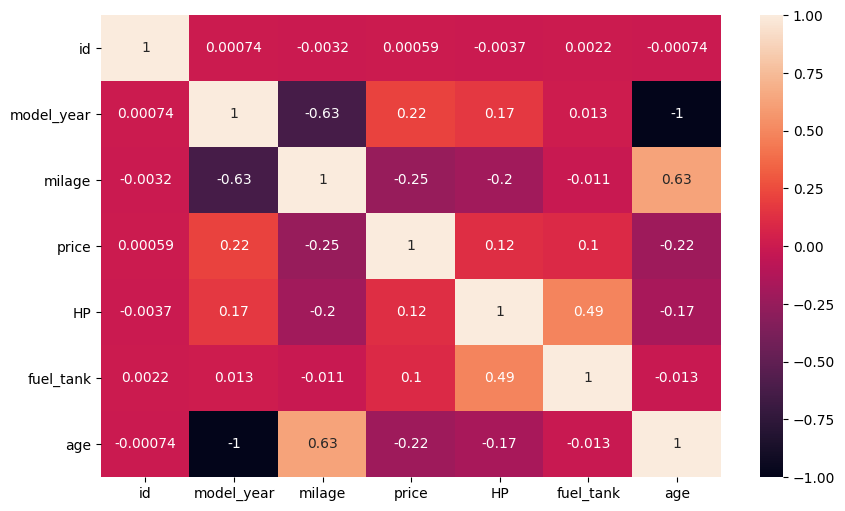

In [51]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [43]:
pd.DataFrame(pd.concat([train.nunique(), test.nunique()], axis=1))

,0,1
id,54273,36183.0
brand,53,53.0
model,1827,1791.0
model_year,34,34.0
milage,3212,2973.0
fuel_type,7,7.0
engine,1061,1038.0
transmission,46,44.0
ext_col,260,230.0
int_col,124,111.0


In [30]:
set(train['brand'].unique().tolist())-set(test['brand'].unique().tolist()), set(test['brand'].unique().tolist())-set(train['brand'].unique().tolist())

({'Maybach', 'Plymouth'}, {'Saab', 'smart'})

In [32]:
train[train['brand']=='Saab'].shape, test[test['brand']=='Saab'].shape

((0, 13), (2, 12))

In [29]:
len(set(train['model'].unique().tolist())-set(test['model'].unique().tolist())), len(set(test['model'].unique().tolist())-set(train['model'].unique().tolist()))

(68, 32)

In [33]:
len(set(train['fuel_type'].unique().tolist())-set(test['fuel_type'].unique().tolist())), len(set(test['fuel_type'].unique().tolist())-set(train['fuel_type'].unique().tolist())) 

(0, 0)

In [52]:
len(set(train['transmission'].unique().tolist())-set(test['transmission'].unique().tolist())), \
    len(set(test['transmission'].unique().tolist())-set(train['transmission'].unique().tolist())) 

(4, 2)

In [53]:
len(set(train['ext_col'].unique().tolist())-set(test['ext_col'].unique().tolist())), \
    len(set(test['ext_col'].unique().tolist())-set(train['ext_col'].unique().tolist())) 

(45, 15)

In [54]:
len(set(train['int_col'].unique().tolist())-set(test['int_col'].unique().tolist())), \
    len(set(test['int_col'].unique().tolist())-set(train['int_col'].unique().tolist())) 

(22, 9)

In [21]:
train.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [22]:
test.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06
